# Linear Regression

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("insurance_data.csv")
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


# EDA

In [40]:
df.shape

(1338, 13)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [42]:
#checking for null values
df.isnull()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [44]:
df.isnull().sum().sum()

52

In [45]:
#checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [46]:
df.duplicated().sum()

0

In [47]:
#how many people are smokers and non-smokers
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [48]:
list_cols=list(df.columns)
print(list_cols)

['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount', 'past_consultations', 'num_of_steps', 'Hospital_expenditure', 'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges']


In [49]:
for x in list_cols:
    if df[x].dtype=='object':
        df[x].fillna(df[x].mode()[0],inplace=True)
    else:
        df[x].fillna(df[x].mean(),inplace=True)

In [50]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

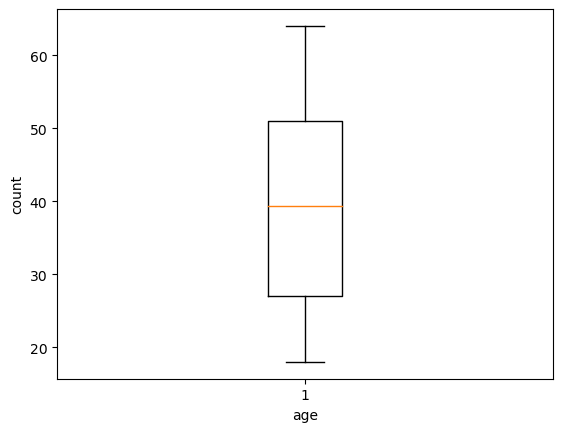

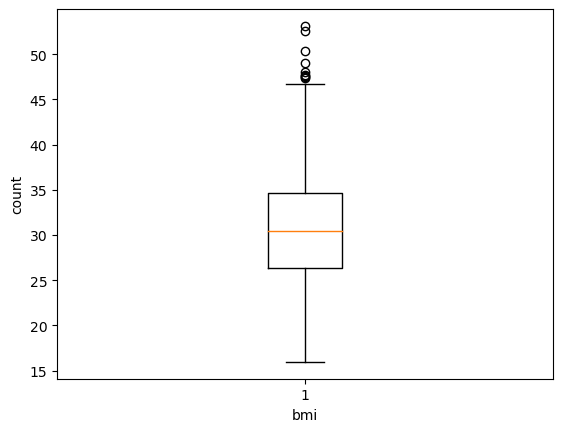

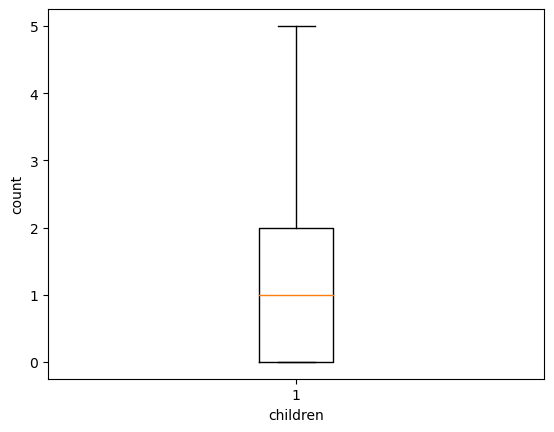

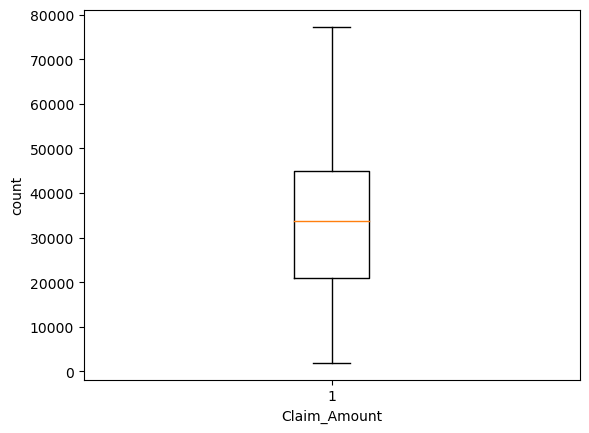

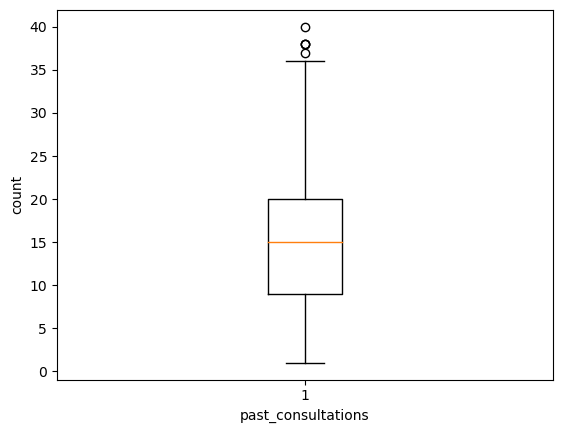

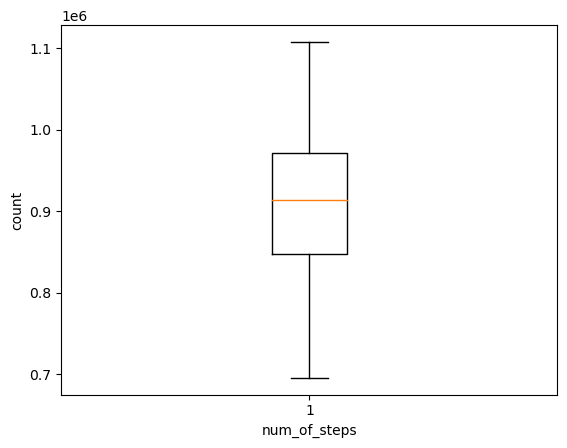

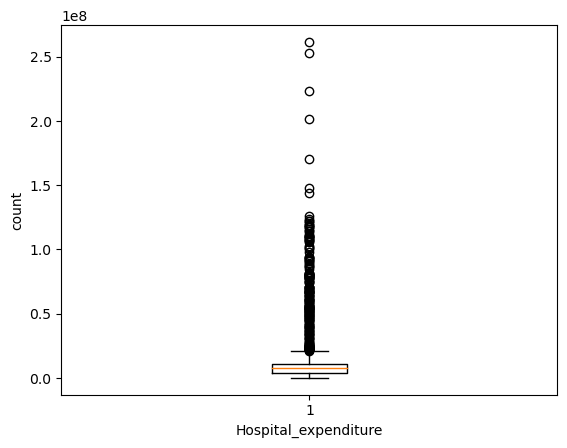

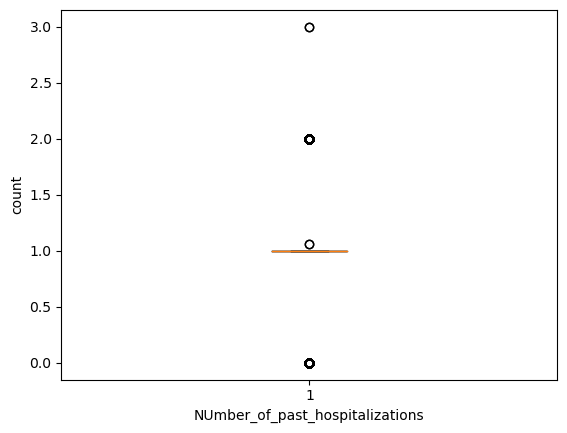

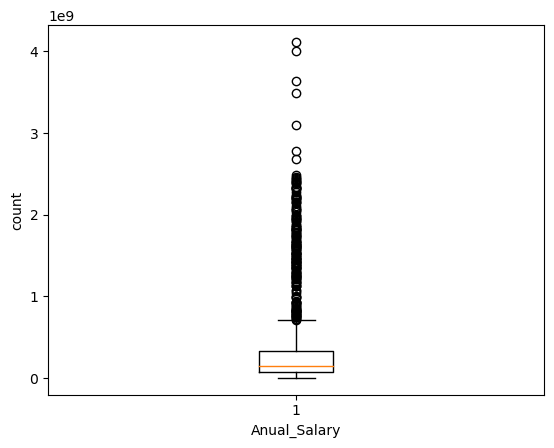

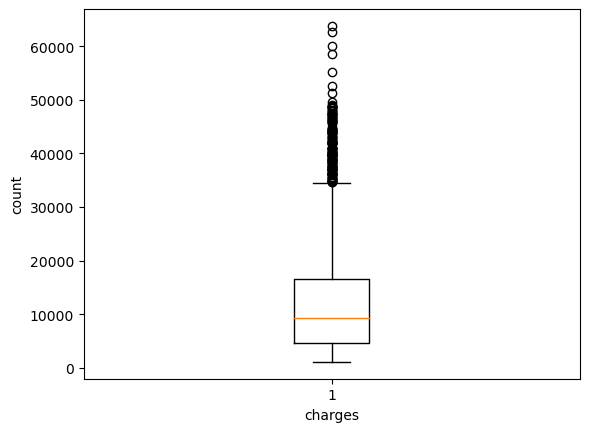

In [51]:
#checking for outliers
for x in list_cols:
    if df[x].dtype=='object':
        continue
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()

In [52]:
#removing outliers

for x in list_cols:
    if df[x].dtype=='object' or x=='charges':
        continue
    Q1=df[x].quantile(0.25)
    Q3=df[x].quantile(0.75)

    IQR=Q3-Q1

    low_bound=Q1-1.5*IQR
    up_bound=Q3+1.5*IQR
    print(low_bound,up_bound)
    df=df[(df[x]>= low_bound) & (df[x]<= up_bound)]

-9.0 87.0
13.803125000000003 47.168124999999996
-3.0 5.0
-15079.880879999993 80991.7952
-7.5 36.5
662100.125 1155245.125
-6066324.56875 20930808.357249998
1.0 1.0
-99592205.85625002 384246561.35375


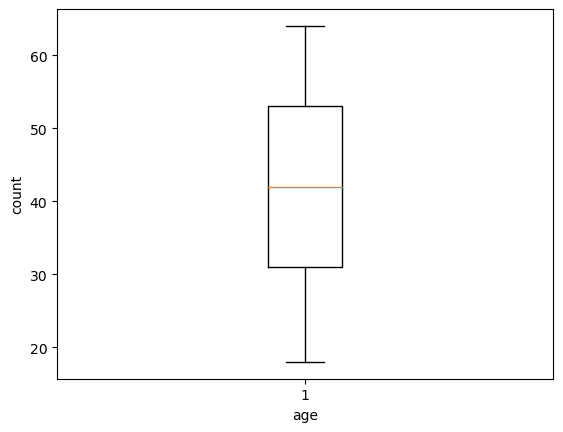

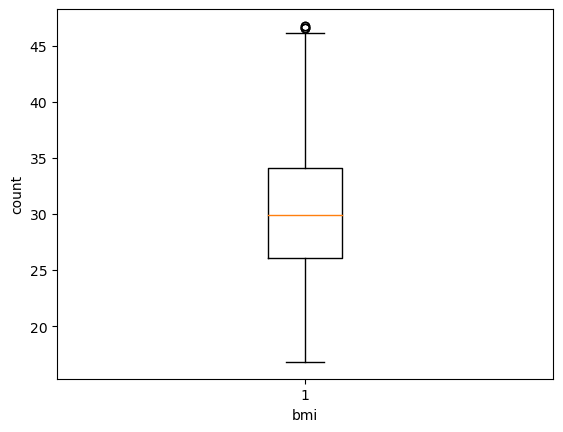

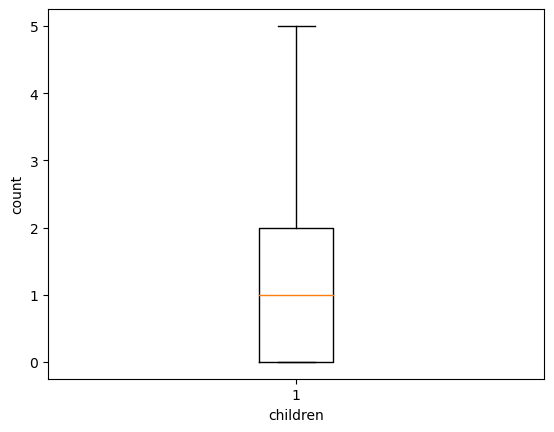

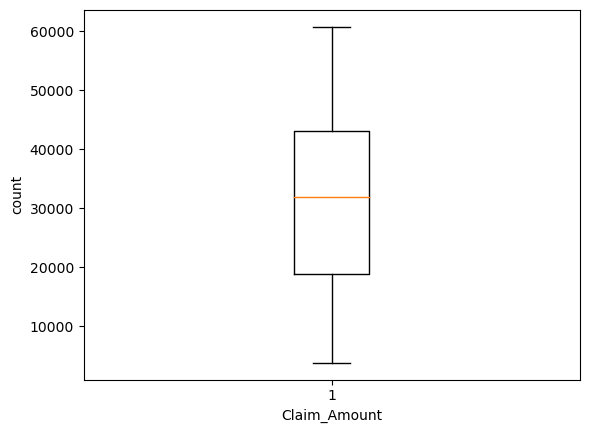

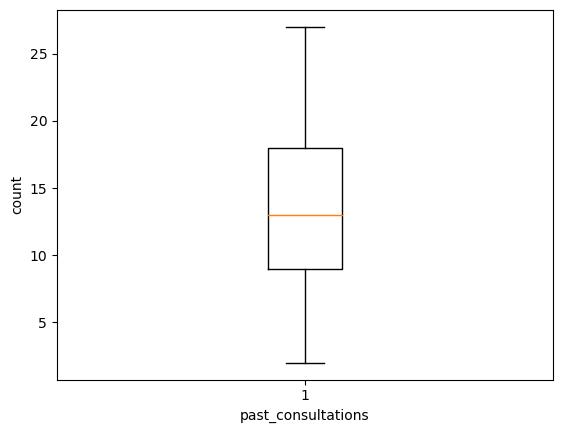

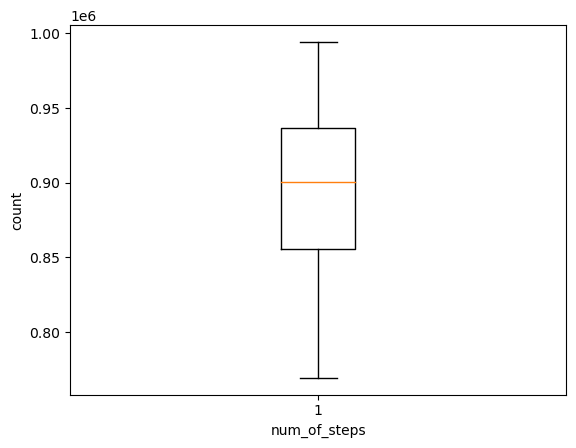

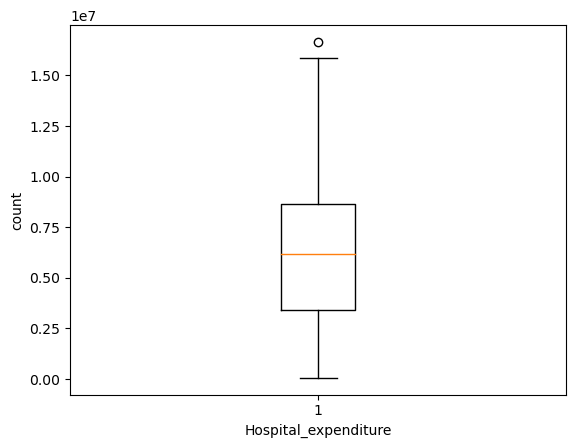

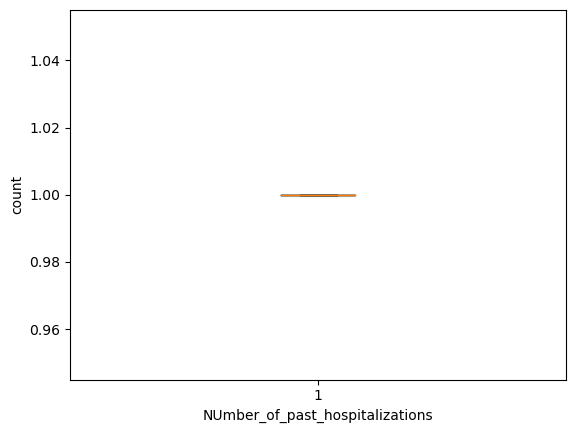

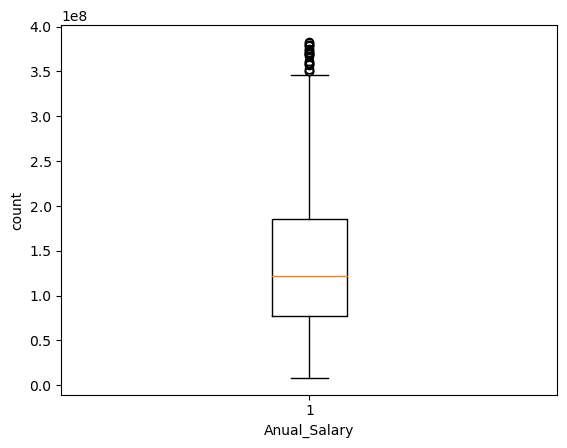

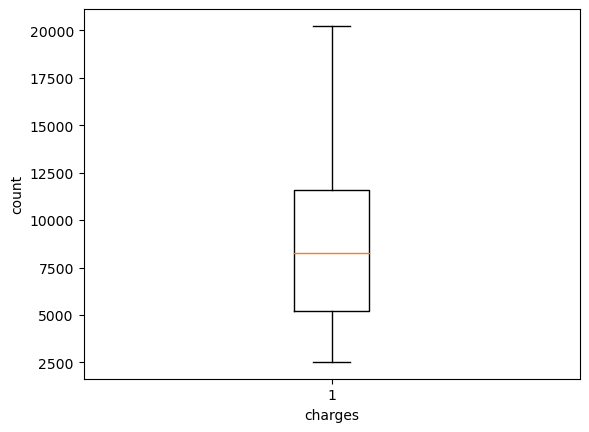

In [53]:
for x in list_cols:
    if df[x].dtype=='object':
        continue
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()

In [54]:
df.shape

(881, 13)

# Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()

In [57]:
for x in list_cols:
    if df[x].dtype=='object':
        df[x]=le.fit_transform(df[x])

In [58]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [61]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0


In [62]:
y

151      2523.16950
152      2527.81865
153      2534.39375
154      2566.47070
155      2585.26900
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 881, dtype: float64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25) # train_size=0.75

In [65]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
257,26.0,1,30.875,2.0,0,11610.725190,5.0,831665.0,2.538781e+06,1.0,9.694710e+07,1
984,62.0,0,38.095,2.0,0,31290.403510,13.0,976717.0,8.442531e+06,1.0,3.264673e+08,0
639,44.0,1,21.850,3.0,0,12447.876650,19.0,907367.0,5.660951e+06,1.0,1.485807e+08,0
368,29.0,0,38.830,3.0,0,22639.716430,5.0,846992.0,3.401758e+06,1.0,1.121716e+08,2
1008,19.0,0,28.300,0.0,1,54312.361350,15.0,979696.0,1.482590e+07,1.0,3.784483e+08,3
...,...,...,...,...,...,...,...,...,...,...,...,...
618,39.0,0,34.320,5.0,0,22583.553560,18.0,901103.0,9.196279e+06,1.0,1.421699e+08,2
685,47.0,1,29.830,3.0,0,24999.302860,21.0,913240.0,1.871147e+06,1.0,1.675184e+08,1
724,55.0,1,29.900,0.0,0,18229.407420,18.0,936266.0,1.791633e+06,1.0,1.343530e+08,3
746,55.0,1,27.645,0.0,0,25238.363470,11.0,935369.0,2.086869e+06,1.0,1.649883e+08,1


In [66]:
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
836,55.0,0,32.395,1.0,0,44783.25580,17.0,933275.0,8961969.353,1.0,1.473249e+08,0
500,37.0,1,22.705,3.0,0,38959.61255,6.0,881361.0,1787166.930,1.0,5.588399e+07,0
854,60.0,1,25.740,0.0,0,10462.19721,15.0,954922.0,8333000.685,1.0,2.155723e+08,2
862,56.0,0,37.510,2.0,0,27390.75310,18.0,936905.0,8352039.478,1.0,2.200270e+08,2
492,43.0,1,26.030,0.0,0,23707.35321,5.0,890104.0,9398373.325,1.0,8.412306e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
539,45.0,1,30.200,1.0,0,10853.28315,19.0,891489.0,1548610.671,1.0,6.963409e+07,3
409,30.0,0,19.950,3.0,0,37388.98639,18.0,872671.0,1643666.409,1.0,1.027029e+08,1
648,50.0,1,37.070,1.0,0,12340.24502,8.0,924987.0,8192837.023,1.0,1.360807e+08,2
303,29.0,1,32.110,2.0,0,50874.98966,11.0,842067.0,1295881.058,1.0,3.472714e+07,1


In [71]:
y_train

257      3877.30425
984     15230.32405
639      8891.13950
368      5138.25670
1008    17081.08000
           ...     
618      8596.82780
685      9620.33070
724     10214.63600
746     10594.50155
551      7633.72060
Name: charges, Length: 660, dtype: float64

In [72]:
y_test

836    11879.10405
500     6985.50695
854    12142.57860
862    12265.50690
492     6837.36870
          ...     
539     7441.05300
409     5693.43050
648     9048.02730
303     4433.91590
860    12235.83920
Name: charges, Length: 221, dtype: float64

In [67]:
lin_model=LinearRegression()

In [68]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [69]:
model_predicted=lin_model.predict(x_test)

In [70]:
model_predicted

array([10940.1857287 ,  6344.95992993, 13058.84436512, 12225.16423468,
        7515.64519989,  8856.28552314, 11285.00814545,  5846.94533371,
        7120.91382174,  7817.97313263, 13588.86335861,  9934.1499918 ,
        5648.6156696 ,  2939.43241107, 17654.39343941, 11221.34529299,
       13421.14906638,  5266.27540621,  9057.05005131, 10842.81036408,
        5155.75860746, 12919.06096899, 13147.88526941,  6271.90790979,
        7059.92019823, 11960.06869114,  4772.33769986,  6672.2726558 ,
       13756.62972832,  5656.77171447, 12359.08280095,  8790.61879651,
       11009.92364133,  5888.54050385, 14847.17705197,  7340.70890919,
       12995.82526748, 10633.95144247, 10559.5650049 ,  8748.12720825,
        8379.6681721 , 10207.01163929, 13923.73145013,  8282.63562779,
       13314.73069351, 14287.56141313,  1676.89070893,   146.51342518,
       10976.71939329,  9818.09012215,  8962.12180325,  7624.60118407,
        7693.1767844 ,  2641.2556597 ,  8189.52791861, 11953.5959058 ,
      

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
mse=mean_squared_error(y_test,model_predicted)
mse

586274.3088297838

In [78]:
r2_acc=r2_score(y_test,model_predicted)
r2_acc

0.9621526750607218

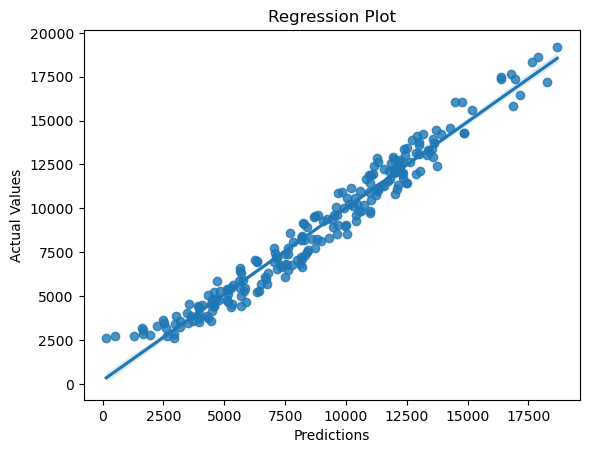

In [80]:
#best fit line
sns.regplot(x=model_predicted,y=y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Regression Plot")
plt.show()

# Thank You